# Выпускная квалификационная работа по курсу 'Data Science'
## Прогнозирование конечных свойств новых материалов (композиционных материалов). 

### Автор: Степанова Василиса Валерьевна

## Разведочный анализ данных

In [2]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
import pickle
import tensorflow as tf
from tensorflow import keras

In [3]:
# Загружаю исходные данные из файла X_bp
X_bp = pd.read_excel('S:\Учёба\Бауманка\ВКР\VKR_Stepanova_Vasilisa\datasets\X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [4]:
# Загружаю исходные данные из файла X_nup
X_nup = pd.read_excel('S:\Учёба\Бауманка\ВКР\VKR_Stepanova_Vasilisa\datasets\X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [5]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

В датасете осталось 1023 строки, часть строк из таблицы X_nup была отброшена.

In [6]:
# Сохраняю объединенные данные
df.to_excel('S:\Учёба\Бауманка\ВКР\VKR_Stepanova_Vasilisa\datasets\data_merged.xlsx')

In [7]:
# Вывожу первые 5 строк объединённой таблицы
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа   
0                         1.857143            2030.0             738.736842  \
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2   
0                        30.00                        22.267857  \
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2   
0                100.000000                          210.0  \
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа   
0                                  70.0                         3000.0  \
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [8]:
# Смотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Все признаки имеют тип float64 и int64, признаков с типом "object" нет - значит нет строковых значений вместо чисел.

In [9]:
# Проверяю на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропуски отсутствуют

In [10]:
#Проверяю на наличие дубликатов
df.duplicated().sum()

0

Дубликаты отсутствуют

In [11]:
# Проверяю количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [12]:
# Смотрю описательную статистику, транспонирую для удобства доступа к названиям колонок, добавляю медиану.
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

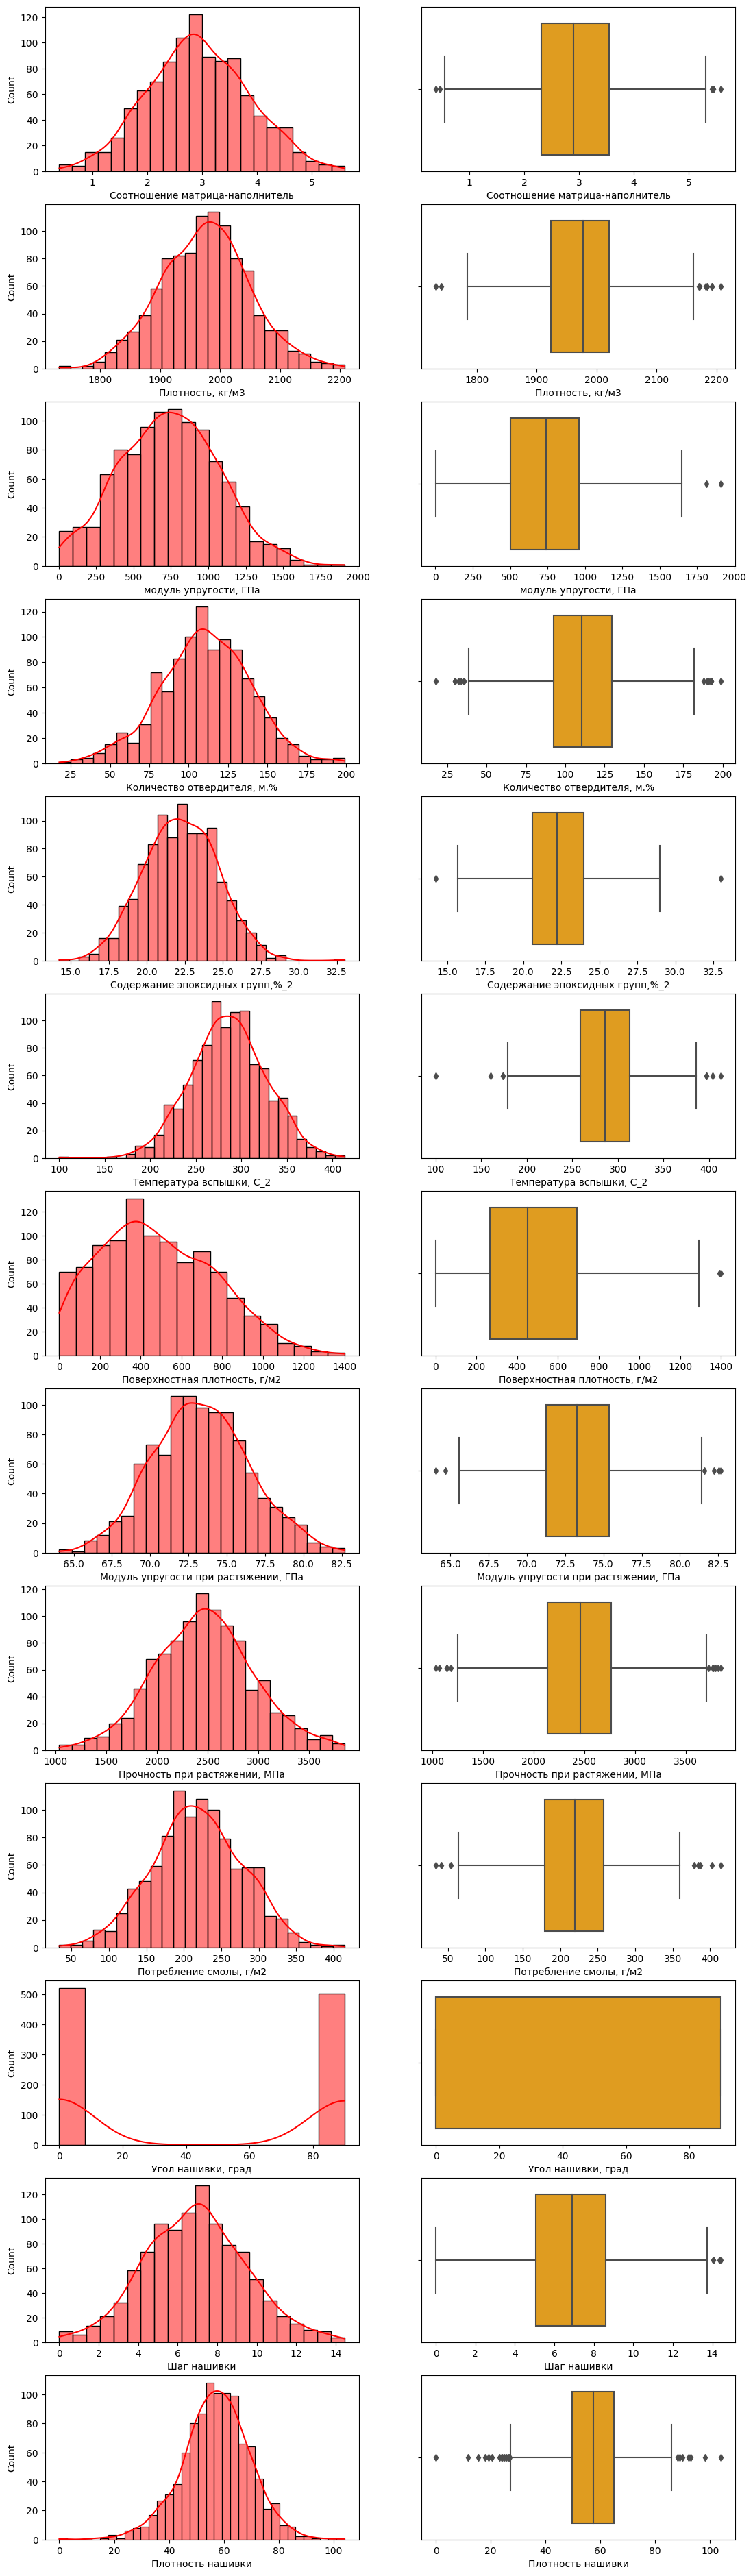

In [13]:
# Строю графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0], color = 'r')
    sns.boxplot(data=df, x=column, ax=axes[k, 1], color = 'orange')
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.

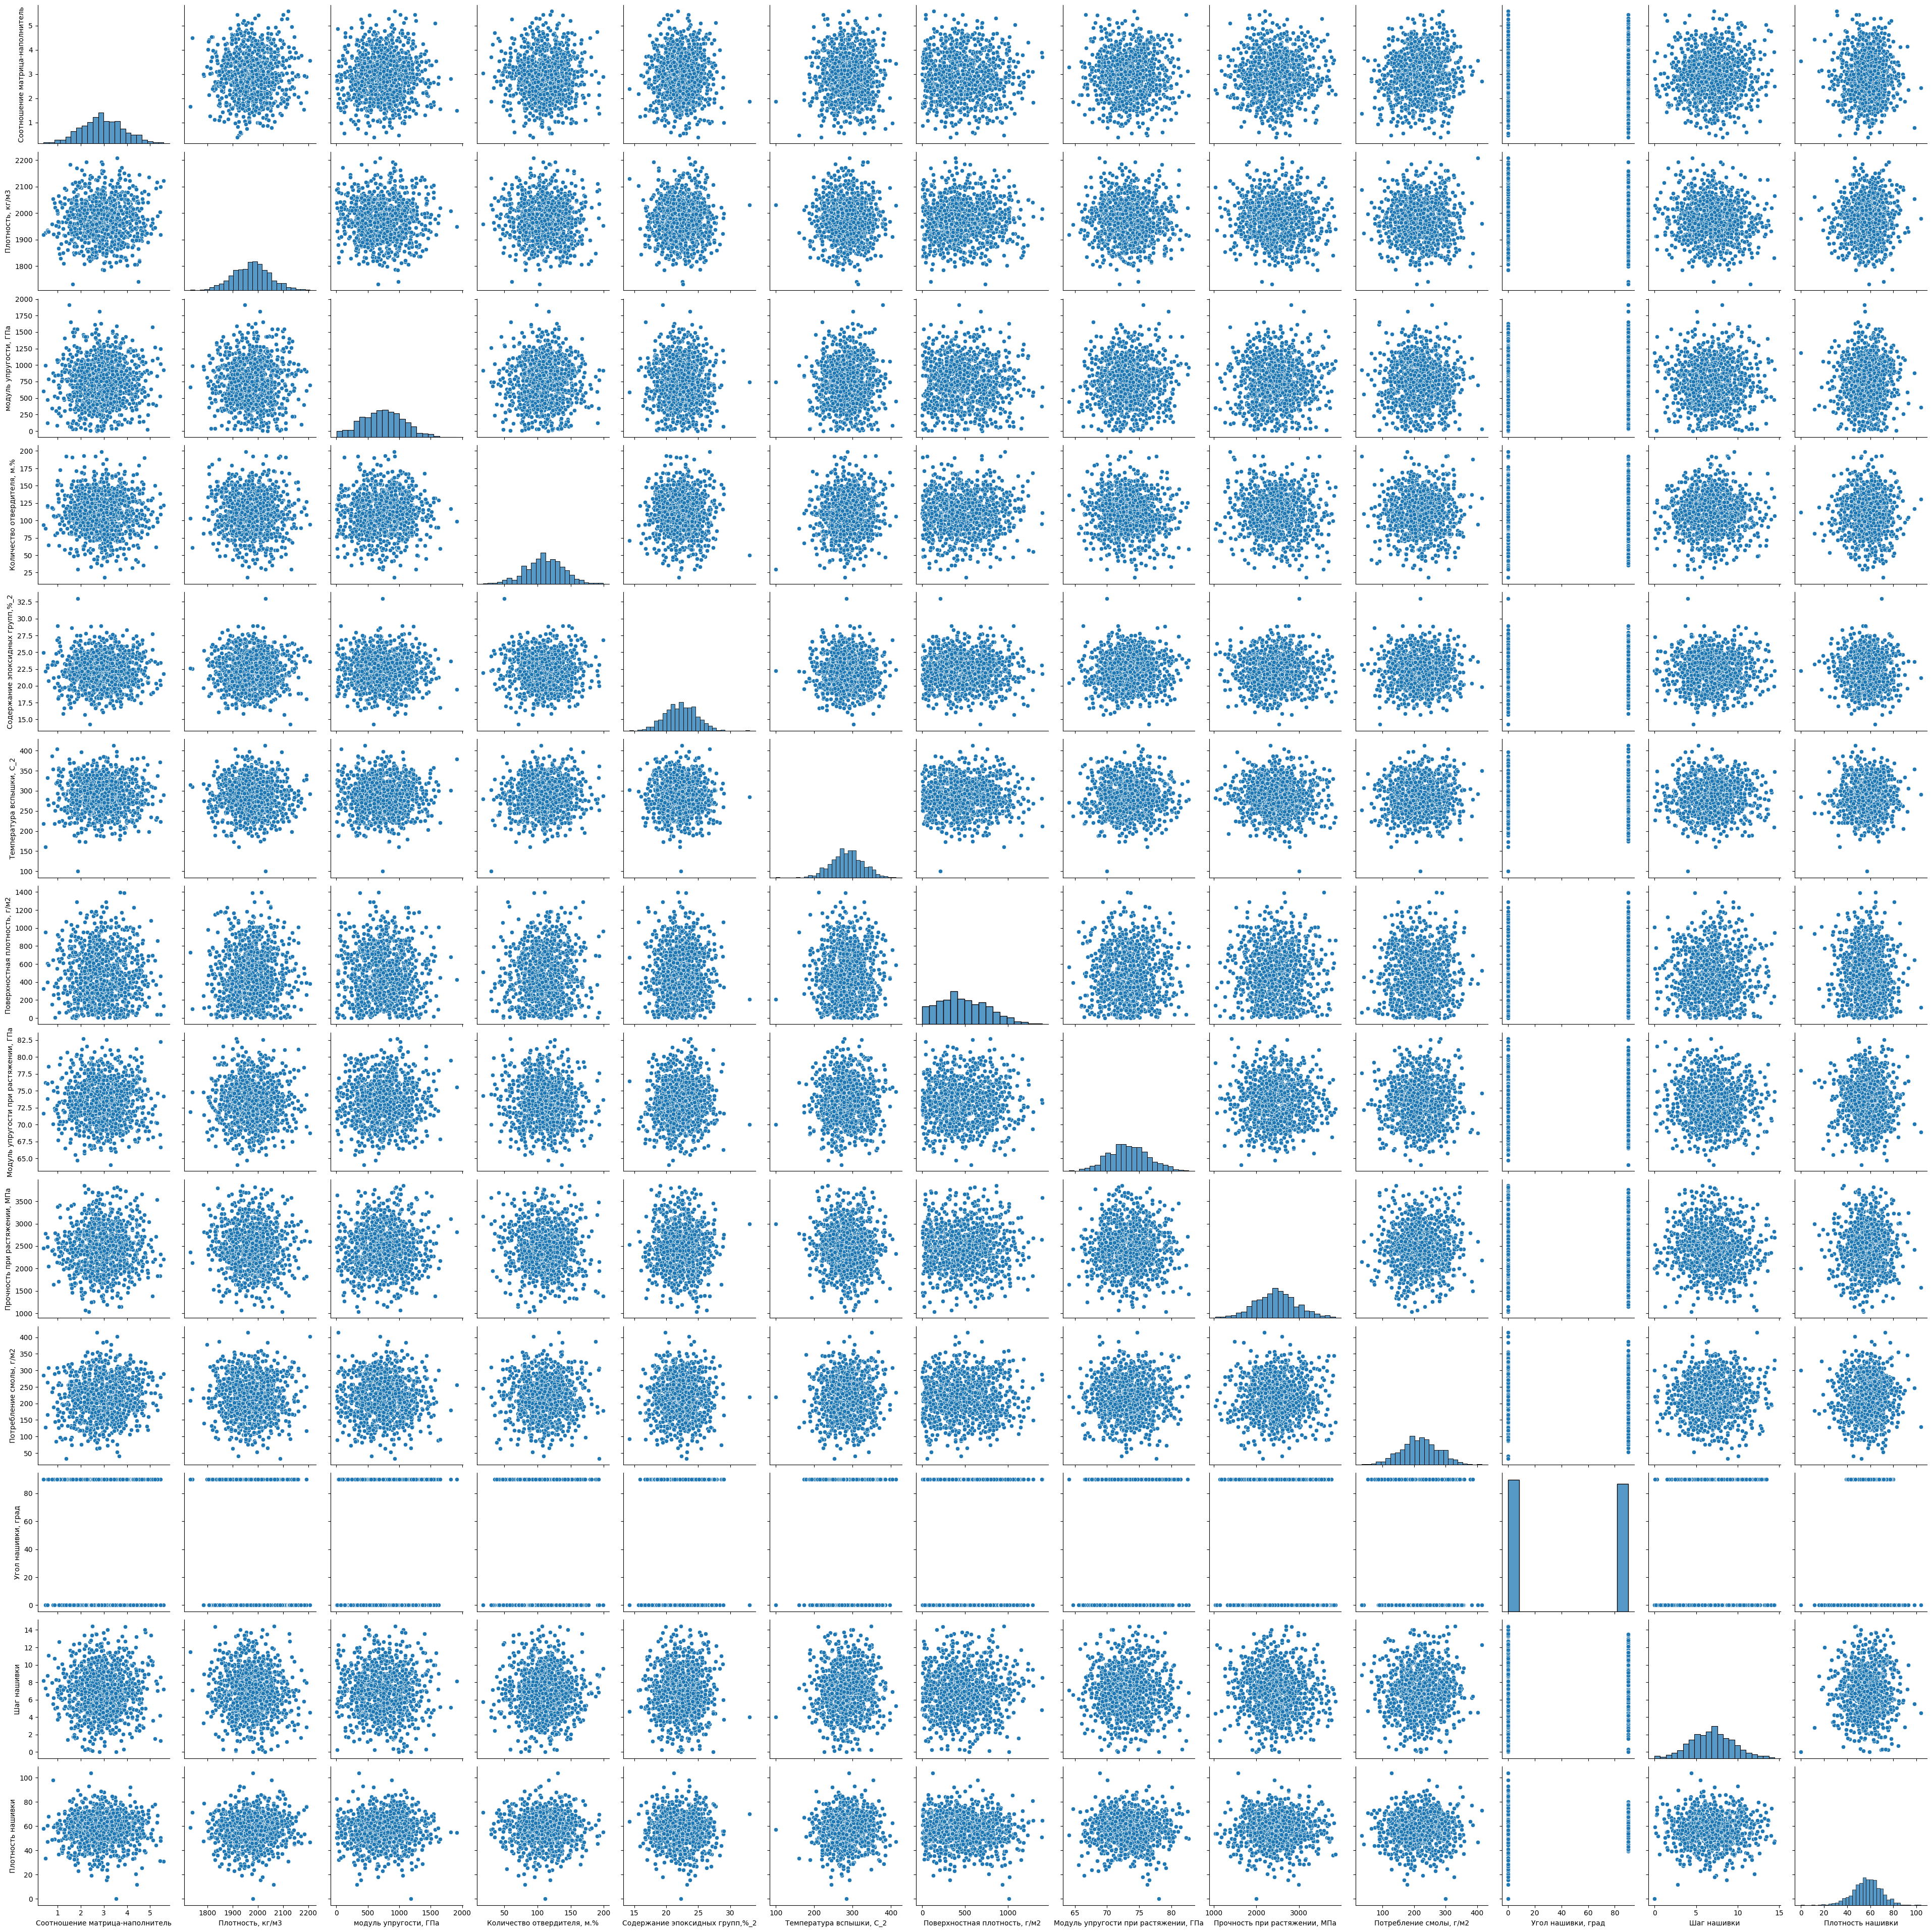

In [14]:
# Cтрою попарные графики рассеяния
sns.pairplot(df, height=3);

Соотношение матрица-наполнитель: 3s=0 iq=6


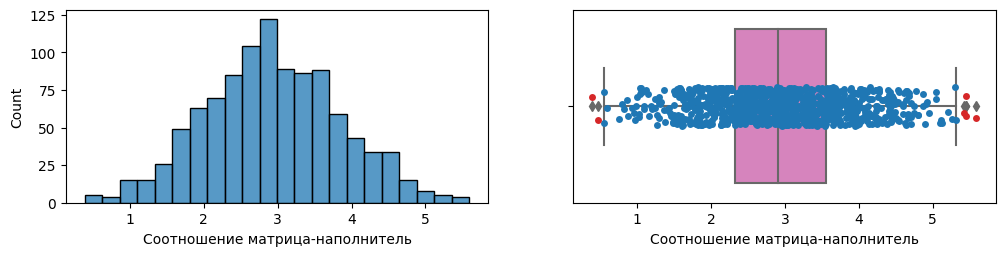

Плотность, кг/м3: 3s=3 iq=9


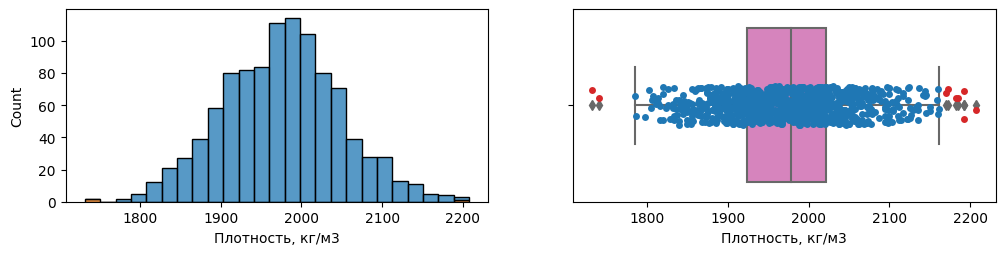

модуль упругости, ГПа: 3s=2 iq=2


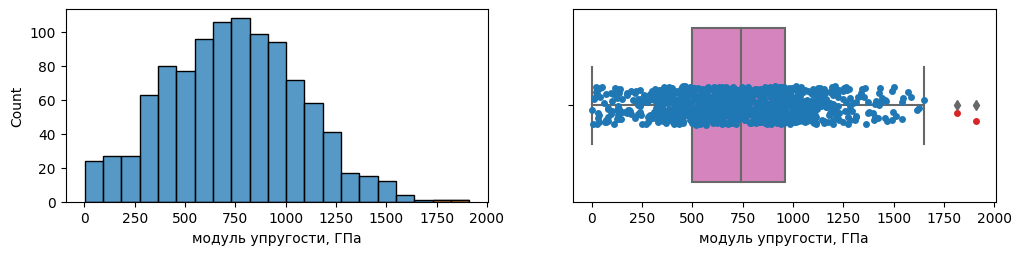

Количество отвердителя, м.%: 3s=2 iq=14


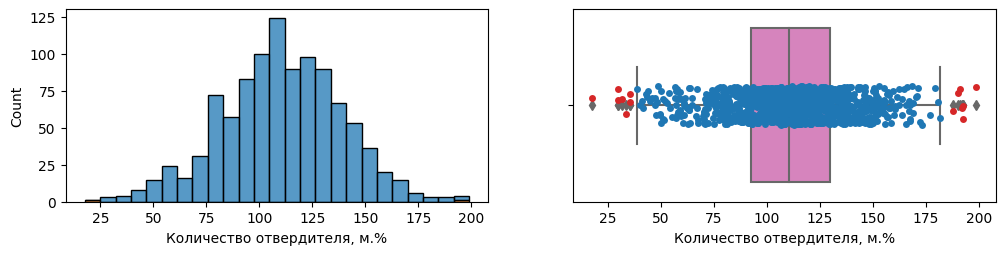

Содержание эпоксидных групп,%_2: 3s=2 iq=2


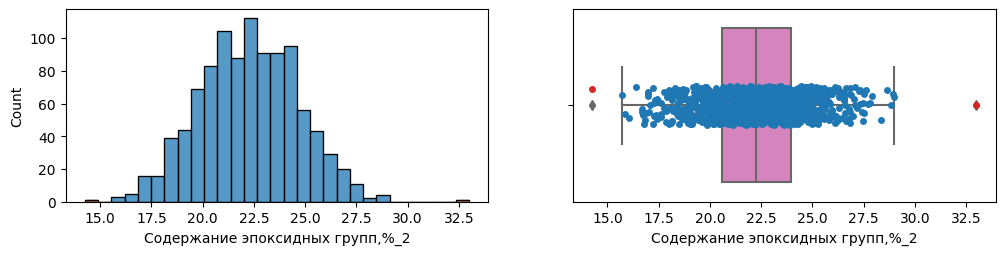

Температура вспышки, С_2: 3s=3 iq=8


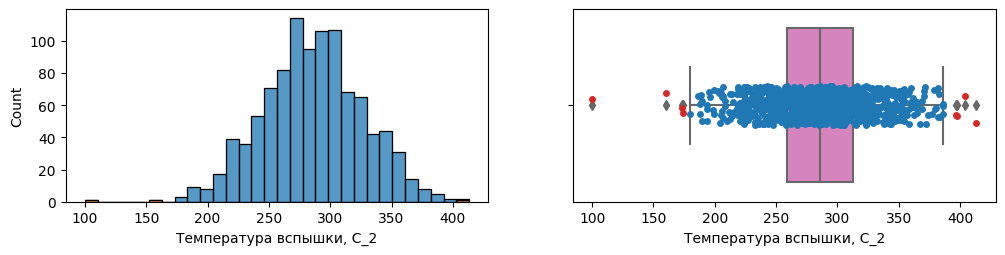

Поверхностная плотность, г/м2: 3s=2 iq=2


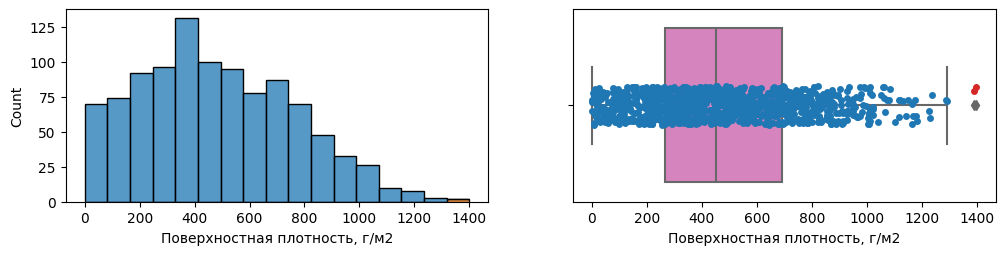

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


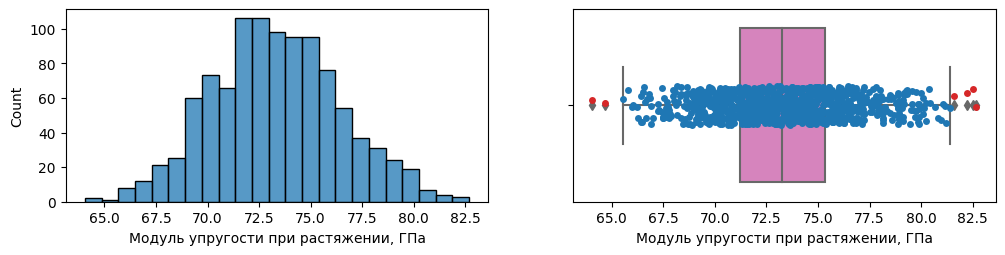

Прочность при растяжении, МПа: 3s=0 iq=11


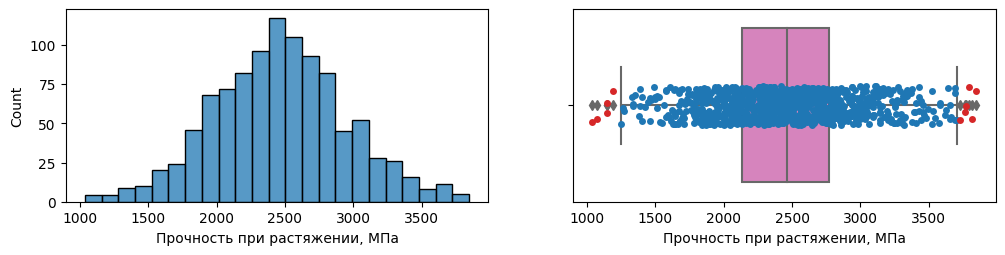

Потребление смолы, г/м2: 3s=3 iq=8


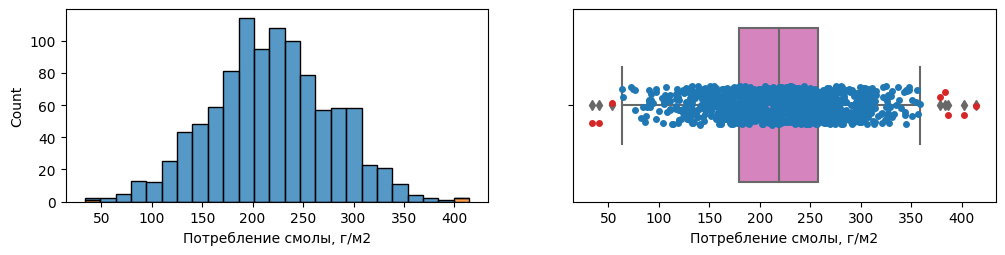

Угол нашивки, град: 3s=0 iq=0


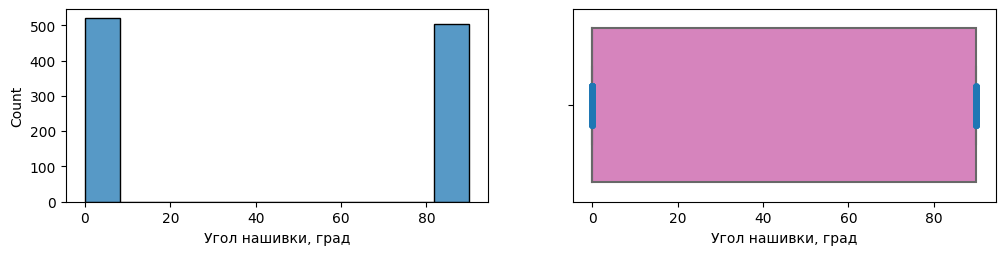

Шаг нашивки: 3s=0 iq=4


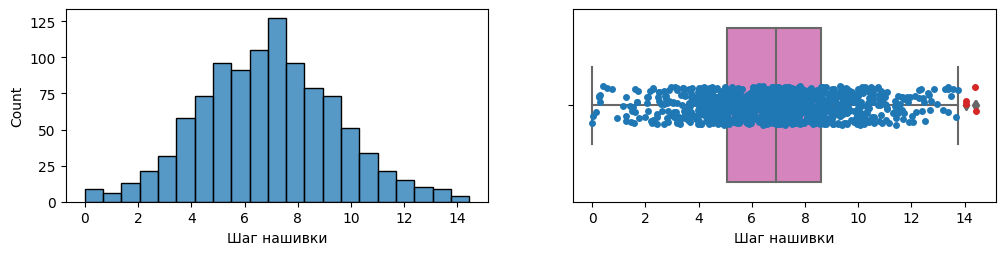

Плотность нашивки: 3s=7 iq=21


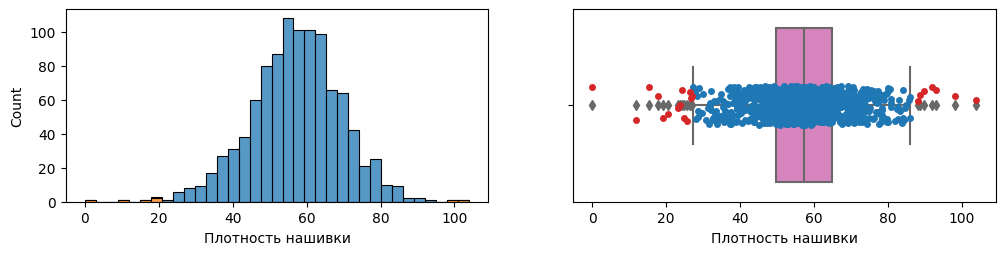

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [15]:
# Ищу выбросы. Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. 
# Экспериментирую, как они отработают на данном наборе данных.
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:pink', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Вот что получилось:

    Метод 3-х сигм, выбросов по всем переменным: 24
    Метод межквартильных расстояний, выбросов по всем переменным: 93
    
Буду удалять выбросы методом межквартильных расстояний для максимальной чистоты, так как использую методы чувствительные к выбросам.

In [16]:
# Удаляю выбросы методом межквартильных расстояний
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers[column] = (df[column] <= lower) | (df[column] >= upper)
df = df[outliers.sum(axis=1)==0]
df.shape    

(936, 13)

In [17]:
# Проверяю выбросы после очистки

count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    
print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 10


In [18]:
# Удаляю выбросы методом межквартильных расстояний 2-ой раз
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers[column] = (df[column] <= lower) | (df[column] >= upper)
df = df[outliers.sum(axis=1)==0]
df.shape

(926, 13)

In [19]:
# Проверяю выбросы после 2-ой очистки

count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    
print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 4


In [20]:
# Удаляю выбросы методом межквартильных расстояний 3-ий раз
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers[column] = (df[column] <= lower) | (df[column] >= upper)
df = df[outliers.sum(axis=1)==0]
df.shape

(922, 13)

In [21]:
# Проверяю выбросы после 3-ей очистки

count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    
print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 0


In [22]:
# Сохраняю очищенные данные
df.to_excel('S:\Учёба\Бауманка\ВКР\VKR_Stepanova_Vasilisa\datasets\data_cleaned.xlsx')

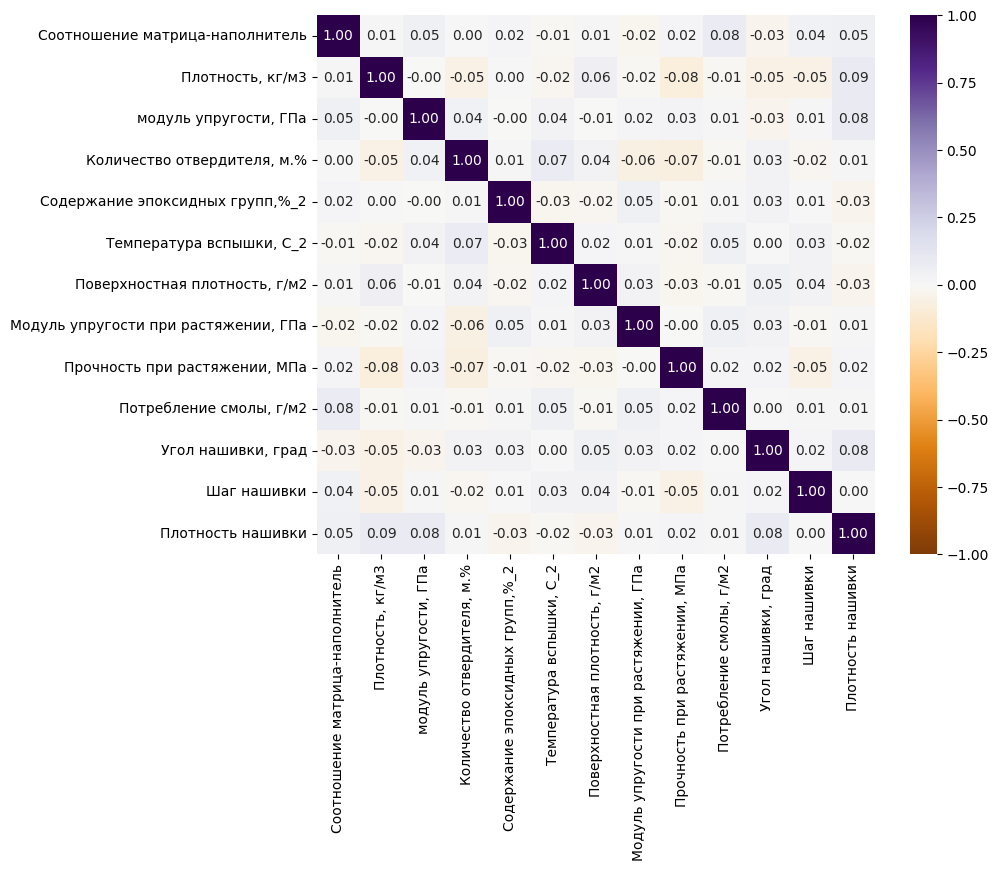

In [23]:
# Рассмотриваю матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuOr', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаю, что применение линейных моделей регрессии не даст приемлемого результата.

## Предобработка данных

In [24]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel('S:\Учёба\Бауманка\ВКР\VKR_Stepanova_Vasilisa\datasets\data_cleaned.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3   
1                            1.857143       2030.000000  \
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%   
1                738.736842                    50.000000  \
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2   
1                           23.750000                284.615385  \
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа   
1                        210.000000                             70.000000  \
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2   
1                       3000.000000               220.000000  \
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

Посмотрю на средние и медианные знчения датасета после удаления выбросов.

In [25]:
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

В данной работе необходимо разработать модели, которые будут использоваться для прогноза модуля упругости при растяжении, прочности при растяжении и соотношения матрица-наполнитель.

Для каждого из целевых признаков построю отдельную модель, следовательно решу 3 отдельные задачи.

In [26]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [27]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [28]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [29]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [30]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [31]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение).

Препроцессинг для категориальных и количественных признаков выполняем по-разному.

Категориальный признак один - 'Угол нашивки, град'. Он принимает значения 0 и 90. Использую OrdinalEncoder, чтобы признак принимал значения 0 и 1.

Вещественных количественных признаков у нас большинство. Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую нормализацию и MinMaxScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные никак не изменяю.

In [32]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [33]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", MinMaxScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [34]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", MinMaxScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [35]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", MinMaxScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [36]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

## Разработка и обучение моделей

Необходимо попробовать разные модели. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [37]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [38]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [39]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn. Я использую DummyRegressor.

### Модель для модуля упругости при растяжении, ГПа

In [40]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [41]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (645, 11) y1_train: (645, 1)
x1_test: (277, 11) y1_test: (277, 1)


In [42]:
# Выполняю препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [43]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [44]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [45]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

In [46]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y1_train, columns=['Модуль упругости при растяжении, ГПа']))

In [47]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не оказалась подходящей для наших данных.

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Lasso показала одинаковые результаты с базовой моделью. 

Гораздо хуже линейных с гиперпараметрами по умолчанию деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [48]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [49]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [50]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
755  {'alpha': 60, 'positive': True, 'solver': 'lbfgs'} -2.433792     1

In [51]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [52]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
6  {'alpha': 0.15} -2.434764     1
7   {'alpha': 0.2} -2.434764     1
8   {'alpha': 0.5} -2.434764     1
9     {'alpha': 1} -2.434764     1

In [53]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [54]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
11  {'C': 0.03, 'kernel': 'rbf'} -2.434354     1

In [55]:
# Попробую подобрать параметры для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [56]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
13  {'n_neighbors': 29} -2.470094     1

In [57]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [58]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params   
1    {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 1, 'random_state': 3128, 'splitter': 'random'}  \
61    {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'random_state': 3128, 'splitter': 'random'}   
181        {'criterion': 'poisson', 'max_depth': 1, 'max_features': 1, 'random_state': 3128, 'splitter': 'random'}   

          MAE  rank  
1   -2.426078     1  
61  -2.426078     1  
181 -2.426078     1

In [59]:
# Попробую подобрать параметры для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [60]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

params   
13  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 1, 'n_estimators': 100, 'random_state': 3128}  \

         MAE  rank  
13 -2.461833    10

In [61]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации -0.008194 у модели Ridge, что чуть лучше базовой модели.

Метод опорных векторов в процессе подбора гиперпараметров лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров сильно улучшили результат, но только сравнялись с базовой моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Почему-то мне не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [62]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [63]:
# Предсказание лучшей модели
best_model1 = Ridge(alpha=60, positive=True, solver='lbfgs')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

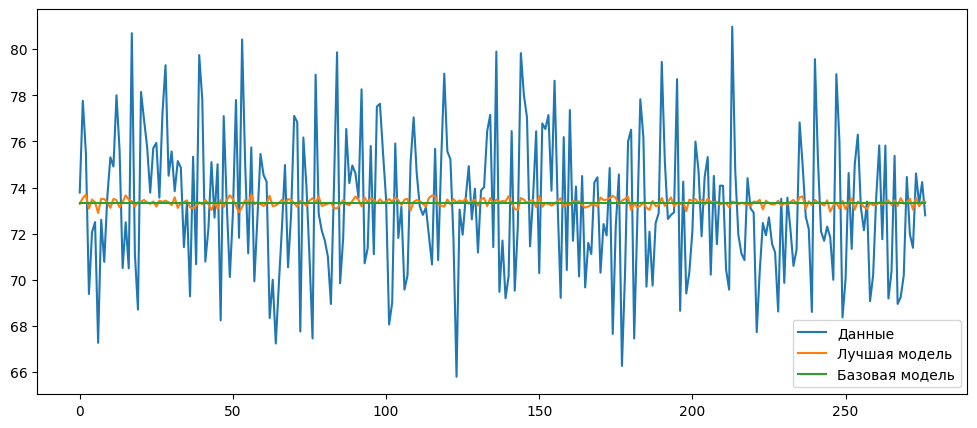

In [64]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

In [65]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1_1=get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1_2=get_metrics('Лучшая модель (модель Ridge)', y1_test, y1_pred_best)
compare1_3=pd.concat([compare1_1, compare1_2])
compare1_3

R2      RMSE       MAE      MAPE   
Базовая модель               -0.001840 -3.023023 -2.480618 -0.033942  \
Лучшая модель (модель Ridge) -0.007314 -3.031272 -2.486880 -0.034029   

                              max_error  
Базовая модель                -7.628576  
Лучшая модель (модель Ridge)  -7.581602

### Модель для прочности при растяжении, МПа

In [66]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (645, 11) y2_train: (645, 1)
x2_test: (277, 11) y2_test: (277, 1)


In [67]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [68]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [69]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [70]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [71]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y2_train, columns=['Прочность при растяжении, МПа']))

In [72]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Метод опорных векторов и Lasso показали себя чуть лучше базовой модели.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева.

In [73]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [74]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [75]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
505  {'alpha': 60, 'random_state': 3128, 'solver': 'sag'} -366.642494     1

In [76]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [77]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
2  {'alpha': 5} -366.086794     1

In [78]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [79]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
12  {'C': 0.2, 'gamma': 'scale', 'kernel': 'rbf'} -366.569324     1

In [80]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [81]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params   
4   {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 3, 'random_state': 3128, 'splitter': 'best'}  \
64   {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 3, 'random_state': 3128, 'splitter': 'best'}   

           MAE  rank  
4  -365.998753     1  
64 -365.998753     1

In [82]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [83]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params   
45  {'loss': 'absolute_error', 'max_depth': 1, 'max_features': 11, 'n_estimators': 50, 'random_state': 3128}  \

           MAE  rank  
45 -368.817375     1

In [84]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же попробовала несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовала GradientBoosting. Но он не показал себя лучше линейных моделей. 

Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики.

После подбора параметров Lasso-регрессия показала лучший результат. Коэффициент детерминации стал немного больше, что показывает чуть лучшую объясняющую способность модели. Но, к сожалению, он всё ещё меньше нуля.

In [85]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [86]:
# Предсказание лучшей модели
best_model2 = Lasso(alpha=5)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

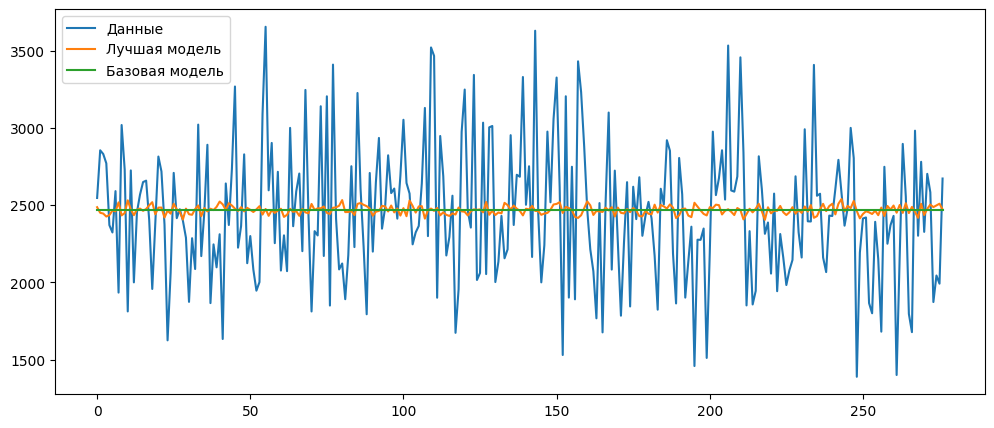

In [87]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Как и для модуля упругости при растяжении, мы таже видим насколько не соответствует лучшая модель исходным данным.

In [88]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2_1=get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2_2=get_metrics('Лучшая модель (модель Lasso)', y2_test, y2_pred_best)
compare2_3=pd.concat([compare2_1, compare2_2])
compare2_3

R2        RMSE         MAE      MAPE   
Базовая модель               -0.001555 -439.676848 -350.354301 -0.151168  \
Лучшая модель (модель Lasso) -0.009342 -441.382723 -350.450799 -0.151207   

                                max_error  
Базовая модель               -1187.738138  
Лучшая модель (модель Lasso) -1179.461001

### Модель для соотношения матрица-наполнитель

In [89]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (645, 12) y3_train: (645, 1)
x3_test: (277, 12) y3_test: (277, 1)


In [90]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [91]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [92]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [93]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [94]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y3_train, columns=['Соотношение матрица-наполнитель']))

По заданию для соотношения матрица-наполнитель необходимо построить нейросеть.

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [95]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [96]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую модель MLPRegressor из библиотеки sklearn.

In [97]:
from sklearn.neural_network import MLPRegressor

In [98]:
# Настраиваю нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [99]:
%%time
# Запускаю нейросеть
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 2.73147726
Validation score: -5.670580
Iteration 2, loss = 2.48728031
Validation score: -4.999977
Iteration 3, loss = 2.23236944
Validation score: -4.339525
Iteration 4, loss = 1.98994843
Validation score: -3.709787
Iteration 5, loss = 1.75369559
Validation score: -3.061406
Iteration 6, loss = 1.51022970
Validation score: -2.395661
Iteration 7, loss = 1.25867992
Validation score: -1.751212
Iteration 8, loss = 1.02695943
Validation score: -1.190203
Iteration 9, loss = 0.81856943
Validation score: -0.687535
Iteration 10, loss = 0.63850495
Validation score: -0.276956
Iteration 11, loss = 0.49724849
Validation score: -0.032832
Iteration 12, loss = 0.42866853
Validation score: -0.054213
Iteration 13, loss = 0.45492293
Validation score: -0.185746
Iteration 14, loss = 0.49302836
Validation score: -0.172564
Iteration 15, loss = 0.47954351
Validation score: -0.081687
Iteration 16, loss = 0.44617987
Validation score: -0.017575
Iteration 17, loss = 0.42610751
Validation score:

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

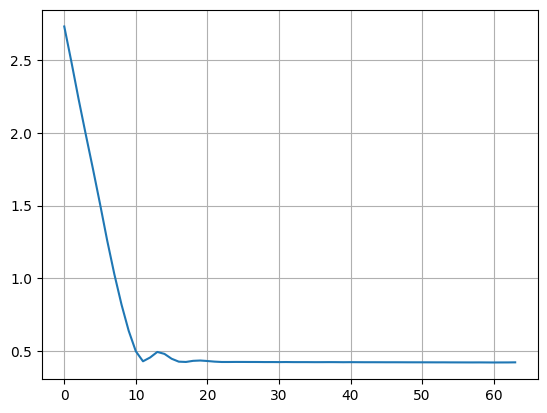

In [100]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [101]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

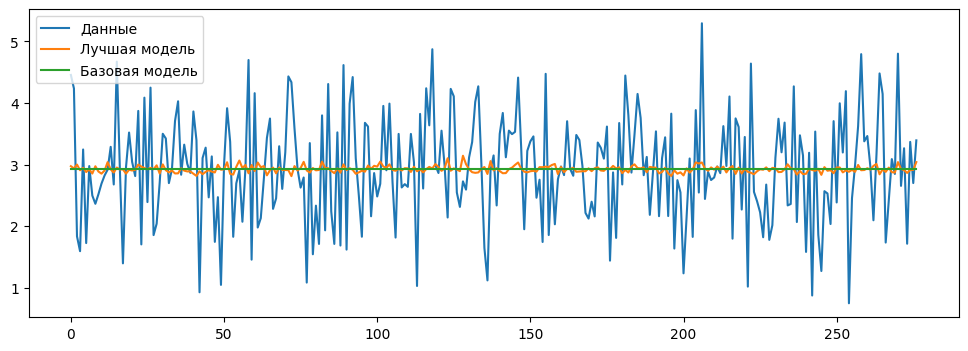

In [102]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [103]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1=get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2=get_metrics('MLPRegressor', y3_test, y3_pred_skl)
compare3_3=pd.concat([compare3_1, compare3_2])
compare3_3

R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.000074 -0.868130 -0.691547 -0.296759  -2.370117
MLPRegressor    0.007322 -0.864914 -0.694770 -0.296923  -2.260243

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Ошибки MAE и MAPE немного хуже, чем у базовой модели. А вот коэффициент детерминации получился больше нуля. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

In [118]:
# Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [119]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [120]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [121]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [122]:
# Собираю нейросеть
model3_2 = construct_model()

In [123]:
# Компилирую нейросеть
model3_2 = compile_model(model3_2)

In [124]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)               

In [125]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 92.2678 - root_mean_squared_error: 2.8692 - val_loss: 79.0042 - val_root_mean_squared_error: 2.5492
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 56.4015 - root_mean_squared_error: 1.9923 - val_loss: 30.8433 - val_root_mean_squared_error: 1.0211
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 35.4383 - root_mean_squared_error: 1.0239 - val_loss: 31.0456 - val_root_mean_squared_error: 1.1390
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 34.2470 - root_mean_squared_error: 1.2189 - val_loss: 29.7502 - val_root_mean_squared_error: 1.0383
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 32.8751 - root_mean_squared_error: 0.9951 - val_loss: 29.6309 - val_root_mean_squared_error: 1.0450
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 31.6224 - root_mean_squared_error: 1.0546 - val_loss: 29.2149 - val

15/15 [==============================] - 0s 4ms/step - loss: 28.0550 - root_mean_squared_error: 0.9847 - val_loss: 29.5093 - val_root_mean_squared_error: 0.9618
Epoch 49/50
15/15 [==============================] - 0s 3ms/step - loss: 27.9384 - root_mean_squared_error: 0.9617 - val_loss: 29.8144 - val_root_mean_squared_error: 1.0327
Epoch 50/50
15/15 [==============================] - 0s 3ms/step - loss: 28.2629 - root_mean_squared_error: 0.9784 - val_loss: 29.8191 - val_root_mean_squared_error: 1.0171
CPU times: total: 4.25 s
Wall time: 4.06 s


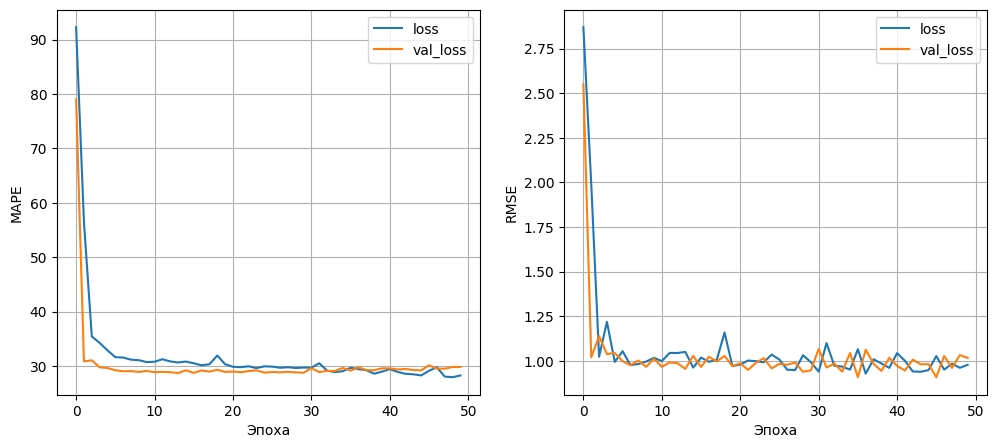

In [126]:
plot_loss(history.history)

In [127]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

9/9 [==============================] - 0s 2ms/step - loss: 28.8258 - root_mean_squared_error: 0.9830


[28.825820922851562, 0.9830385446548462]

In [128]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

9/9 [==============================] - 0s 1ms/step


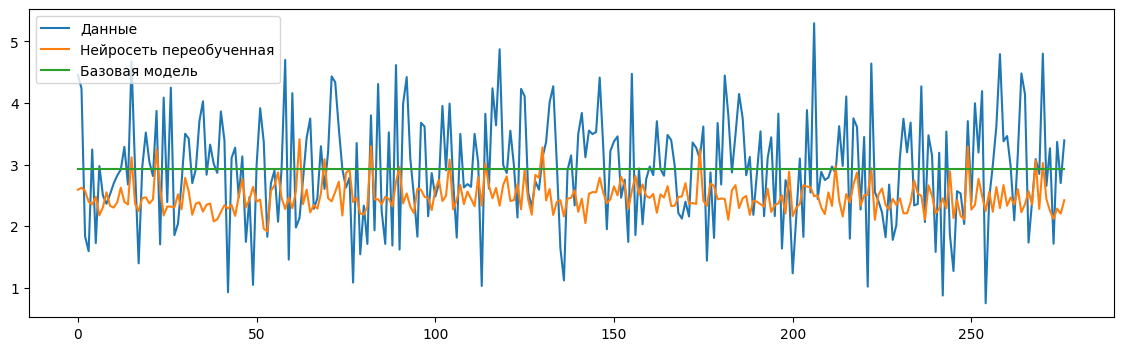

In [129]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробую раннюю остановку процесса обучения для борьбы с переобучением

In [130]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()

In [131]:
model3_3 = compile_model(model3_3)

In [132]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
15/15 [==============================] - 1s 13ms/step - loss: 91.3941 - root_mean_squared_error: 2.8525 - val_loss: 76.6026 - val_root_mean_squared_error: 2.4926
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 53.1043 - root_mean_squared_error: 1.8969 - val_loss: 33.8300 - val_root_mean_squared_error: 0.9637
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 35.4941 - root_mean_squared_error: 1.0307 - val_loss: 31.6553 - val_root_mean_squared_error: 1.1909
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 31.7443 - root_mean_squared_error: 1.1139 - val_loss: 29.9876 - val_root_mean_squared_error: 0.9347
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 31.9781 - root_mean_squared_error: 0.9871 - val_loss: 29.3427 - val_root_mean_squared_error: 1.0494
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 30.1098 - root_mean_squared_error: 1.0043 - val_loss: 28.8829 - val

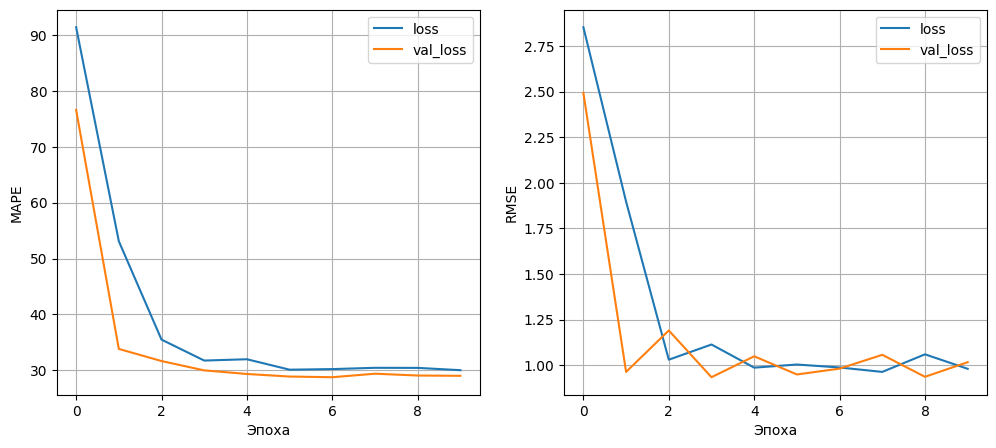

In [133]:
plot_loss(history.history)

In [134]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

9/9 [==============================] - 0s 1ms/step - loss: 29.3582 - root_mean_squared_error: 1.0040


[29.358171463012695, 1.0039921998977661]

In [135]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

9/9 [==============================] - 0s 1ms/step


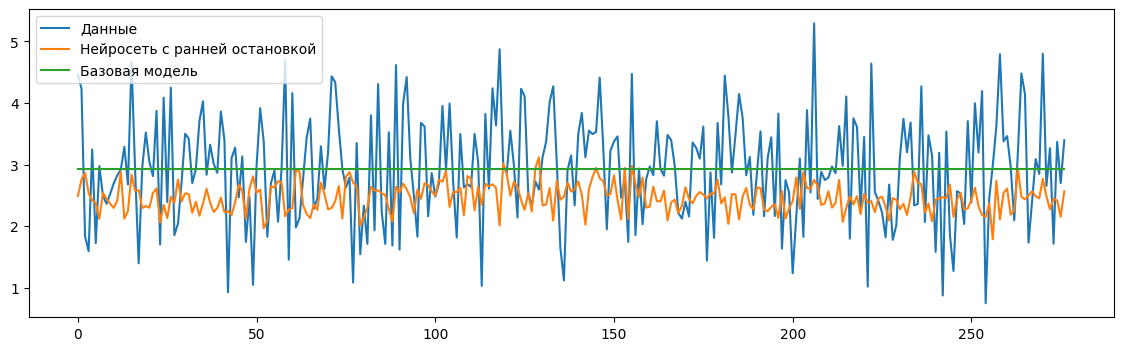

In [136]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [137]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [138]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [139]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [140]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
15/15 [==============================] - 2s 14ms/step - loss: 96.6747 - root_mean_squared_error: 2.9806 - val_loss: 90.2740 - val_root_mean_squared_error: 2.8241
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 75.7516 - root_mean_squared_error: 2.4865 - val_loss: 45.3313 - val_root_mean_squared_error: 1.6855
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 39.6365 - root_mean_squared_error: 1.2759 - val_loss: 28.5700 - val_root_mean_squared_error: 0.9460
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 35.6940 - root_mean_squared_error: 1.2422 - val_loss: 31.0888 - val_root_mean_squared_error: 1.1591
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 34.3153 - root_mean_squared_error: 1.1503 - val_loss: 28.6258 - val_root_mean_squared_error: 0.9838
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 34.0282 - root_mean_squared_error: 1.1464 - val_loss: 30.4009 - val

15/15 [==============================] - 0s 4ms/step - loss: 31.5012 - root_mean_squared_error: 1.0788 - val_loss: 29.8475 - val_root_mean_squared_error: 1.0744
Epoch 49/50
15/15 [==============================] - 0s 4ms/step - loss: 30.0305 - root_mean_squared_error: 0.9753 - val_loss: 28.7685 - val_root_mean_squared_error: 0.9911
Epoch 50/50
15/15 [==============================] - 0s 5ms/step - loss: 30.6207 - root_mean_squared_error: 1.0181 - val_loss: 29.7629 - val_root_mean_squared_error: 1.0681
CPU times: total: 5.08 s
Wall time: 4.77 s


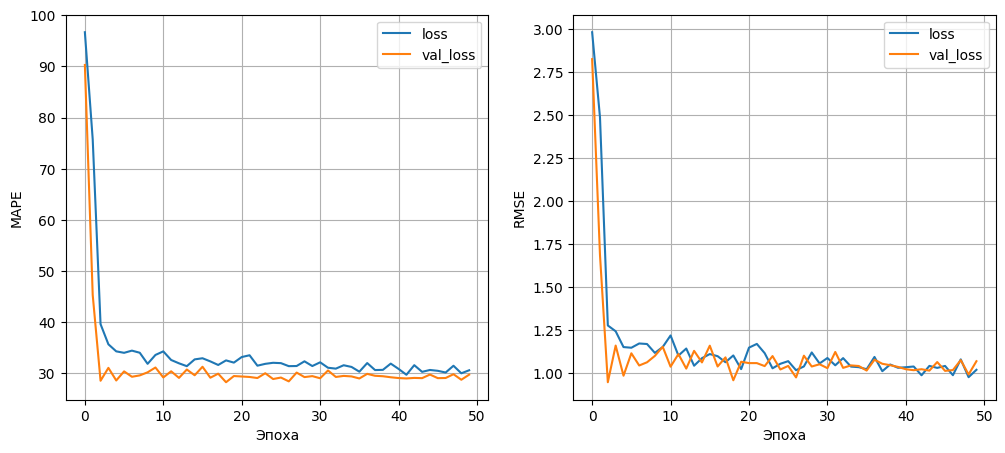

In [141]:
plot_loss(history.history)

In [142]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

9/9 [==============================] - 0s 991us/step - loss: 29.4678 - root_mean_squared_error: 1.0389


[29.467784881591797, 1.0388638973236084]

In [143]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

9/9 [==============================] - 0s 567us/step


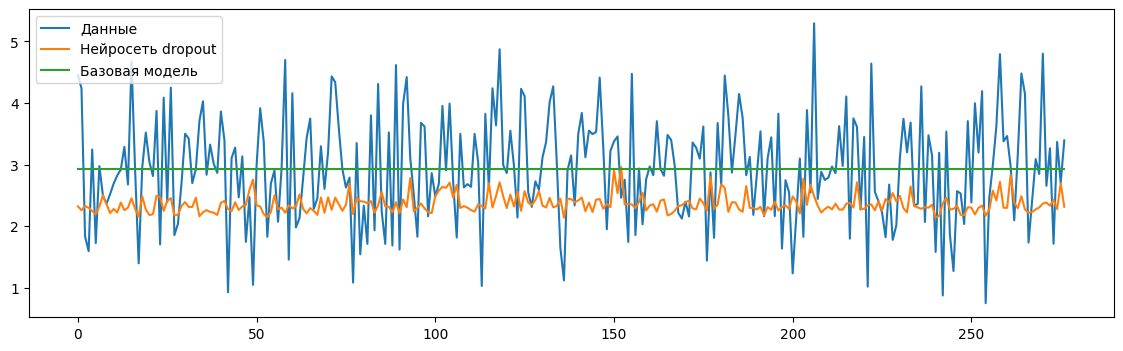

In [144]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [145]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2_1=get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2_2=get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2)
compare3_2_3=get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3)
compare3_2_4=get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4)
compare3_2_5=pd.concat([compare3_2_1, compare3_2_2, compare3_2_3, compare3_2_4])
compare3_2_5

R2      RMSE       MAE      MAPE   
DummyRegressor                -0.000074 -0.868130 -0.691547 -0.296759  \
Нейросеть переобученная       -0.282342 -0.983039 -0.802209 -0.288258   
Нейросеть с ранней остановкой -0.337591 -1.003992 -0.816470 -0.293582   
Нейросеть dropout             -0.432122 -1.038864 -0.847236 -0.294678   

                               max_error  
DummyRegressor                 -2.370117  
Нейросеть переобученная        -2.807613  
Нейросеть с ранней остановкой  -2.862930  
Нейросеть dropout              -2.807533

Нейросеть из библиотеки tensorflow старалась подстроиться к данным. Выглядят результаты «похоже», но метрики разочаровывают. Лучшая обобщающая способность и меньшие значения ошибок на тестовом множестве оказались у нейросети переобученной. Но она, естественно, предсказывает гораздо хуже базовой модели.

Лучший результат чем у Нейросети MLPRegressor получить не удалось. Сохраняю её.

In [146]:
best_model3 = model3_1

### Оценить точность модели на тренировочном и тестовом датасете

In [147]:
## Модель для модуля упругости при растяжении
best_model1

Ridge(alpha=60, positive=True, solver='lbfgs')

In [148]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE   
Модуль упругости, тренировочный  0.010635 -3.008967 -2.422298 -0.033091  \
Модуль упругости, тестовый      -0.007314 -3.031272 -2.486880 -0.034029   

                                 max_error  
Модуль упругости, тренировочный  -7.839390  
Модуль упругости, тестовый       -7.581602

Модель Ridge имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. И коэффициент детерминации на тренировочном датасете чуть больше нуля.

In [149]:
## Модель для прочности при растяжении
best_model2

Lasso(alpha=5)

In [150]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE   
Прочность при растяжении, тренировочный  0.013067 -456.085754 -364.432618  \
Прочность при растяжении, тестовый      -0.009342 -441.382723 -350.450799   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный -0.159590 -1266.944961  
Прочность при растяжении, тестовый      -0.151207 -1179.461001

Модель Lasso имеет ошибку на тестовом датасете меньше, чем на тренировочном. Но коэффициент детерминации на тестовом датасете снова меньше нуля. Значит, модель так и не нашла следы зависимости.

In [151]:
## Модель для соотношения матрица-наполнитель
best_model3

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

In [152]:
result3 = pd.DataFrame()
y3_pred_train = model3_1.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_1.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

R2      RMSE       MAE   
Соотношение матрица-наполнитель, тренировочный  0.007198 -0.903012 -0.728448  \
Соотношение матрица-наполнитель, тестовый       0.007322 -0.864914 -0.694770   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный -0.315134  -2.401036  
Соотношение матрица-наполнитель, тестовый      -0.296923  -2.260243

У нейросети показатели для тестовой выборки чуть лучше показателей тренировочной. Удалось добиться коэффициента детерминации чуть больше нуля, значит модель чему-то обучилась.

### Разработать приложение

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [153]:
with open('preprocessor1.pkl', 'wb') as f:
    pickle.dump(preprocessor1, f)

In [154]:
with open('best_model1.pkl', 'wb') as f:
    pickle.dump(best_model1, f)

In [155]:
with open('preprocessor2.pkl', 'wb') as f:
    pickle.dump(preprocessor2, f)

In [156]:
with open('best_model2.pkl', 'wb') as f:
    pickle.dump(best_model2, f)

In [157]:
with open('preprocessor3.pkl', 'wb') as f:
    pickle.dump(preprocessor3, f)

In [158]:
with open('best_model3.pkl', 'wb') as f:
    pickle.dump(best_model3, f)

In [159]:
model3_2.save('C:\\Users\\stepa\\VKR_Stepanova_Vasilisa\\models\\model3_2\\')

INFO:tensorflow:Assets written to: C:\Users\stepa\VKR_Stepanova_Vasilisa\models\model3_2\assets


INFO:tensorflow:Assets written to: C:\Users\stepa\VKR_Stepanova_Vasilisa\models\model3_2\assets


In [160]:
model3_3.save('C:\\Users\\stepa\\VKR_Stepanova_Vasilisa\\models\\model3_3\\')

INFO:tensorflow:Assets written to: C:\Users\stepa\VKR_Stepanova_Vasilisa\models\model3_3\assets


INFO:tensorflow:Assets written to: C:\Users\stepa\VKR_Stepanova_Vasilisa\models\model3_3\assets


In [161]:
model3_4.save('C:\\Users\\stepa\\VKR_Stepanova_Vasilisa\\models\\model3_4\\')

INFO:tensorflow:Assets written to: C:\Users\stepa\VKR_Stepanova_Vasilisa\models\model3_4\assets


INFO:tensorflow:Assets written to: C:\Users\stepa\VKR_Stepanova_Vasilisa\models\model3_4\assets


In [162]:
# Проверяю загрузку

In [163]:
with open('preprocessor1.pkl', 'rb') as f:
    load_model = pickle.load(f)

In [164]:
with open('best_model1.pkl', 'rb') as f:
    load_model = pickle.load(f)
best_model1

Ridge(alpha=60, positive=True, solver='lbfgs')

In [165]:
with open('preprocessor2.pkl', 'rb') as f:
    load_model = pickle.load(f)

In [166]:
with open('best_model2.pkl', 'rb') as f:
    load_model = pickle.load(f)
best_model2

Lasso(alpha=5)

In [167]:
with open('preprocessor3.pkl', 'rb') as f:
    load_model = pickle.load(f)

In [168]:
with open('best_model3.pkl', 'rb') as f:
    load_model = pickle.load(f)
best_model3

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

In [169]:
model3_2 = keras.models.load_model('C:\\Users\\stepa\\VKR_Stepanova_Vasilisa\\models\\model3_2\\')
model3_2

In [170]:
model3_3 = keras.models.load_model('C:\\Users\\stepa\\VKR_Stepanova_Vasilisa\\models\\model3_3\\')
model3_3

In [171]:
model3_4 = keras.models.load_model('C:\\Users\\stepa\\VKR_Stepanova_Vasilisa\\models\\model3_4\\')
model3_4